# Logit and Logistic Sigmoid Function

The Logistic Regression is a **probablistic model.** 

A *probabalistic model* incorporates random variables and probability distributions into the model of an event or phenomenon. This is different to a **deterministic model,** such as the Rosenblatt's Perceptron, where it gives a single possible outcome for an event. This is representative by a probability distribution solution, where you may have varying probabilities for multiple classes of a single data point.

To explain how the Logistic Regression is a *probablistic model,* we must explore the **odd's ratio (OR).** The *odd's ratio* can be written as:
$$\dfrac{p}{1-p},$$
where p stands for the probability of the postive event.

$\underline{\text{Note}}:$ The term *positive event* does not necessarily mean *good*, but refers to the event that we want to predict. As an example, we may think of the positive event as class label $y=1$. 

We can further define the define the **logit** function, which is the $\log$ of the odds ratio:
$$\text{logit}\left(p\right)=\log\left(\dfrac{p}{1-p}\right)$$

$\underline{\text{Note}}:$ $\log$ is in reference to the natural logarithm.

The *logit* function takes an input values in the range 0 to 1 and transforms them to value sover the entire real-number line, which we can use to express a lienar relationship between features and the log-odds:
$$\text{logit}\left(p\right)=w_0x_0+\dots+w_nx_n=\sum_{i=0}^n=w^Tx$$

Here, $p\left(y=1|x\right)$ is the conditional probability that a particular sample belongs to class 1 given its features x. This ties back to a data point having probablities for multiple classes. Since, we are concerned with probabilites we must use the inverse of the *logit* function, known as the **logistic sigmoid function,** also known as the **sigmoid function.**
$$\phi\left(z\right)=\dfrac{1}{1+e^{-z}},$$
where z is the net input, the linear combination of weights and sample features, $z=w_0x_0+\dots+w_nx_n=w^Tx.$

$\underline{\text{Note}}:$ *Sigmoid Functions* are a family of functions that resemble an S-shape, this can be observed in the graph below. In our case we will be referring to the *logistic sigmoid function* as the *sigmoid function*

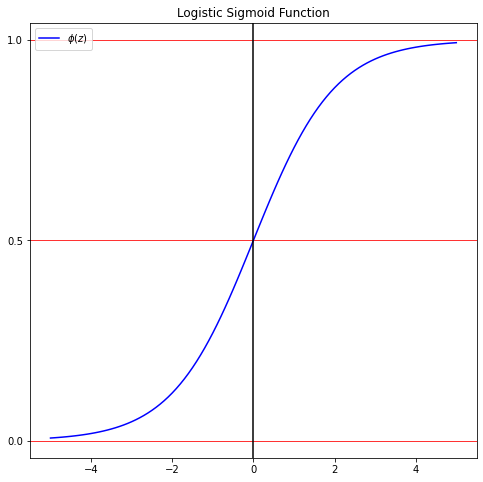

In [18]:
import numpy as np
import matplotlib.pyplot as plt
sigmoid = lambda z: 1/(1+np.e**(-z))
z = np.linspace(-5,5,101)
phi_z = sigmoid(z)
fig = plt.figure(figsize=(8,8))
plt.title('Logistic Sigmoid Function')
plt.plot(z,phi_z,'-b',label=r'$\phi\left(z\right)$')
plt.axvline(x=0,color='k')
plt.yticks([0,.5,1])
ax = plt.gca()
ax.yaxis.grid(True,color='r')
plt.legend()
plt.show()

The output of the sigmoid function is interpreted as the probability of a particular sample belonging to class 1, $\phi\left(z\right)=P\left(y=1|x;w\right),$ given its features x paramterized by the weights w.

In the case of a 2 classes, the predicted probablity can then simply be converted into a binary outcome via a threshold function:
$$\hat y=\cases{1,\phi\left(z\right)\ge0.5\\0,\text{otherwise}}$$
and upon closer inspection to the sigmoid function above is equivalent to
$$\hat y=\cases{1,z\ge0\\0,\text{otherwise}}$$

# Determing the Weights of our Machine

If you read to here so far, the natural question may be "how do I find the weights $w$?" To do this we must use a cost function to optimize our weights. Before we derive the cost function for logistic regression, let us define the likelihood $L$. This *likelihood* we will want to maximize when we build a logistic regression model, assuming that the individual samples in our deataset are independent of one another. The formula goes:
$$L\left(w\right)=P\left(y|x;w\right)=\prod_{i=0}^nP\left(y^{(i)}|x^{(i)};w\right)=\prod_{i=0}^n\left(\phi\left(z^{(i)}\right)\right)^{y^{(i)}}\left(1-\phi\left(z^{(i)}\right)\right)^{1-y^{(i)}}$$
When maximizing likelihood functions it is common to take the natural $\log$ of the function $L$, to convert the multiplication to a sum. This makes the computation of a derivative much easier. This particular *likelihood* is known as the **log-likelihood** function:
$$l\left(w\right)=\log\left(L\left(w\right)\right)=\sum_{i=0}^n\left[y^{(i)}\log\left(\phi\left(z^{(i)}\right)\right)+\left(1-y^{(i)}\right)\log\left(1-\phi\left(z^{(i)}\right)\right)\right]$$
$\underline{\text{Note}}:$ Another reason for applying the log function is to reduces the potential for numerical underflow, which can occur if the likelihoods are very small.

Now we could use an optimization algorithm, such as gradient ascent or Newton's Method to maximize this log-likelihood function. Alternatively, let us rewrite the *log-likelihood* as a cost function $J.$
$$J\left(w\right)=\sum_{i=0}^n\left[-y^{(i)}\log\left(\phi\left(z^{(i)}\right)\right)-\left(1-y^{(i)}\right)\log\left(1-\phi\left(z^{(i)}\right)\right)\right]$$
Consider the above cost function for a single training sample:
$$J\left(\phi\left(z\right),y;w\right)=-y\log\left(\phi\left(z\right)\right)-\left(1-y\right)\log\left(1-\phi\left(z\right)\right)$$
Notice:
$$J\left(\phi\left(z\right),y;w\right)=\cases{-\log\left(\phi\left(z\right)\right),y=1\\-\log\left(1-\phi\left(z\right)\right),y=0}$$
The following cell shows the cost of classifying a single-sample for divvernt values of $\phi\left(z\right):$

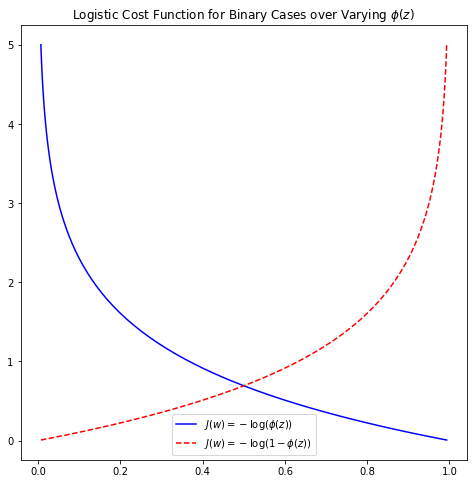

In [27]:
cost_1 = lambda z: -np.log(sigmoid(z))
cost_0 = lambda z: -np.log(1-sigmoid(z))
z = np.linspace(-5,5,101)
phi_z = sigmoid(z)
fig = plt.figure(figsize=(8,8))
plt.title(r'Logistic Cost Function for Binary Cases over Varying $\phi\left(z\right)$')
plt.plot(phi_z,cost_1(z),'-b',label=r'$J\left(w\right)=-\log\left(\phi\left(z\right)\right)$')
plt.plot(phi_z,cost_0(z),'--r',label=r'$J\left(w\right)=-\log\left(1-\phi\left(z\right)\right)$')
plt.legend()
plt.show()

## Gradient of Cost
Using calculus, we can determine the weight update in logistic regression.

$\underline{\text{Note}}:$ This is only useful to those who wish to familiarize themselves with mathematical concepts behind the gradient descent. If you are content with using code without the theoritical reason to why it work the following subsection may be skipped.

Consider the partial derivative of the log-likelihood function with respect to the j$^{th}$ weight:
$$\dfrac{\partial}{\partial w_j}l\left(w\right)=\dfrac{\partial}{\partial w_j}\sum_{i=0}^n\left[y^{(i)}\log\left(\phi\left(z^{(i)}\right)\right)+\left(1-y^{(i)}\right)\log\left(1-\phi\left(z^{(i)}\right)\right)\right]=\left(y^{(j)}\dfrac{1}{\phi\left(z\right)}-\left(1-y^{(j)}\right)\dfrac{1}{1-\phi\left(z\right)}\right)\dfrac{\partial}{\partial w_j}\phi\left(z\right)$$
$\underline{\text{Note}}:$ The reason why the j$^{th}$ term only survives is because all other instances will be set to 0.
Before computing the rest of the computation, let us take the following partial derivative:
$$\dfrac{\partial}{\partial z}\phi\left(z\right)=\dfrac{\partial}{\partial z}\dfrac{1}{1+e^{-z}}=\dfrac{e^{-z}}{\left(1+e^{-z}\right)^2}=\dfrac{1}{1+e^{-z}}\left(1-\dfrac{1}{1+e^{-z}}\right)=\phi\left(z\right)\left(1-\phi\left(z\right)\right)$$
Now observe by multivariate chain rule:
$$\dfrac{\partial}{\partial w_j}\phi\left(z\right)=\dfrac{\partial}{\partial z}\phi\left(z\right)\dfrac{\partial}{\partial w_j}z=\phi\left(z\right)\left(1-\phi\left(z\right)\right)x_j$$
Putting it all together:
$$\dfrac{\partial}{\partial w_j}l\left(w\right)=\left(y^{(j)}\dfrac{1}{\phi\left(z\right)}-\left(1-y^{(j)}\right)\dfrac{1}{1-\phi\left(z\right)}\right)\dfrac{\partial}{\partial w_j}\phi\left(z\right)=\left(y^{(j)}\dfrac{1}{\phi\left(z\right)}-\left(1-y^{(j)}\right)\dfrac{1}{1-\phi\left(z\right)}\right)\phi\left(z\right)\left(1-\phi\left(z\right)\right)x_j\\=\left(y\left(1-\phi\left(z\right)\right)-\left(1-y\right)\phi\left(z\right)\right)x_j=\left(y-\phi\left(z\right)\right)x_j$$
The goal was to find the weights that maximize the log-likelihood so that we can peform the update for each weight as follows:
$$w_j:=w_j+\eta\sum_{i=0}^n\left(y^{(i)}-\phi\left(z^{(i)}\right)\right)x^{(i)}_j$$
Since we update all weights simultaneously, we can write the general update rule as follows:
$$w:=w+\Delta w,$$
where $\Delta w=\eta\nabla l\left(w\right).$ 

Since maximizing the log-likelihood is equal to minimizing the cost function $J$ that we defined earlier, we can write the gradient descent update rule as follows:
$$\Delta w_j=-\eta\dfrac{\partial J}{\partial w_j}=\eta\sum_{i=0}^n\left(y^{(i)}-\phi\left(z^{(i)}\right)\right)x_j\\w:=w+\Delta w, \Delta w=-\eta\nabla J\left(w\right)$$

# Class Implementation of Logistic Regression
To demonstrate this concept we will be using the infamous Iris data set from the UCI server at https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data. The data set contains 4 numerical columns and a class column, where there are 3 classes. For our purposes of demonstration we will be seperating 2 classes of Iris-Setosa and not Iris-Setosa:

In [39]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
f = lambda row: 1 if row=='Iris-setosa' else 0
df.loc[:,4] = df.loc[:,4].apply(f)
X = df.loc[:,[0,1,2,3]]
y = df.loc[:,4]
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


The following cell is our Logistic Regression:

In [73]:
class Logistic_Regression:
    def __init__(self,eta=0.05,n_iter=100,random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self,X,y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0,scale=0.01,size=1+X.shape[1])
        self.cost_ = []
        
        for _ in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = y-output
            self.w_[1:] += self.eta*X.T.dot(errors)
            self.w_[0] += self.eta*errors.sum()
            self.cost_.append(-y.dot(np.log(output))-((1-y).dot(np.log(1-output))))
        return self
    
    def net_input(self,X): return np.dot(X,self.w_[1:])+self.w_[0]
    
    def activation(self,z): return 1/(1+np.e**(-np.clip(z,-250,250)))
    
    def predict(self,X): return np.where(self.net_input(X)>=0,1,0)

The following cell shows how to use scikit-learn to create training and test samples from our data:

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=1)

The following cell shows the implementation of our model:

<ipython-input-73-bedc7958015e>:18: RuntimeWarning: divide by zero encountered in log
  self.cost_.append(-y.dot(np.log(output))-((1-y).dot(np.log(1-output))))


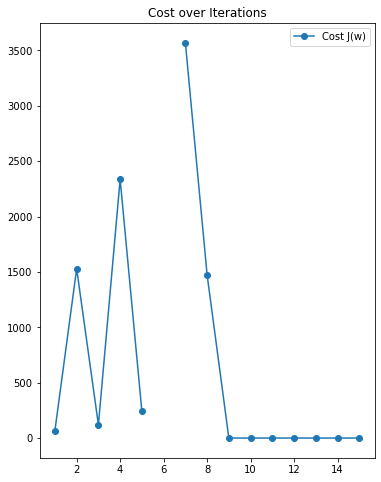

In [78]:
lr = Logistic_Regression(n_iter=15).fit(X_train,y_train)
fig = plt.figure(figsize=(6,8))
plt.title('Cost over Iterations')
plt.plot(range(1,lr.n_iter+1),lr.cost_,'-o',label='Cost J(w)')
plt.legend()
plt.show()

Let us examine the accuracy of our model by using our test sample:

In [82]:
print(f'{sum(lr.predict(X_test)==y_test)/len(X_test)}')

1.0
